X_Minimum : X 최소(삭제)<br>
X_Maximum : X 최대(삭제)<br>
Y_Minimum : Y 최소(삭제)<br>
Y_Maximum : Y 최대(삭제)<br>
**Area : 위의 4가지를 조합해서 새로만든 컬럼 'Area' : (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])<br>**
Pixels_Areas : 픽셀 영역<br>
X_Perimeter<br>
Y_Perimeter<br>
Sum_of_Luminosity<br>
Minimum_of_Luminosity<br>
Maximum_of_Luminosity<br>
Length_of_Conveyer<br>
TypeOfSteel : 0은 A300, 1은 A400<br>
Steel_Plate_Thickness<br>
Edges_Index<br>
Empty_Index<br>
Square_Index<br>
Outside_X_Index<br>
Edges_X_Index<br>
Edges_Y_Index<br>
Outside_Global_Index<br>
LogOfAreas<br>
Log_X_Index<br>
Log_Y_Index<br>
Orientation_Index<br>
Luminosity_Index<br>
SigmoidOfAreas<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 모든 컬럼을 출력할 수 있도록 설정
pd.set_option('display.max_columns', None)

path = '/Users/seongjinhyeon/Desktop/Team_project1/mulit_classification_data.csv'

df = pd.read_csv(path)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
# 데이터프레임 정보 확인(결측치없음)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [4]:
# 중복 확인
df.duplicated().sum()

0

In [5]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
df['Outside_Global_Index'].value_counts()

1.0    1072
0.0     778
0.5      91
Name: Outside_Global_Index, dtype: int64

#### 이상치 확인 boxplot

##### Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Log_Y_Index

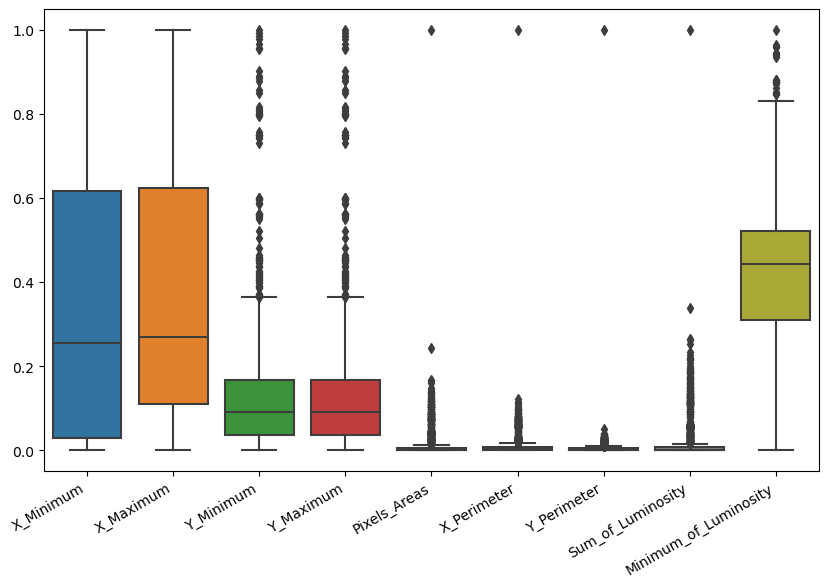

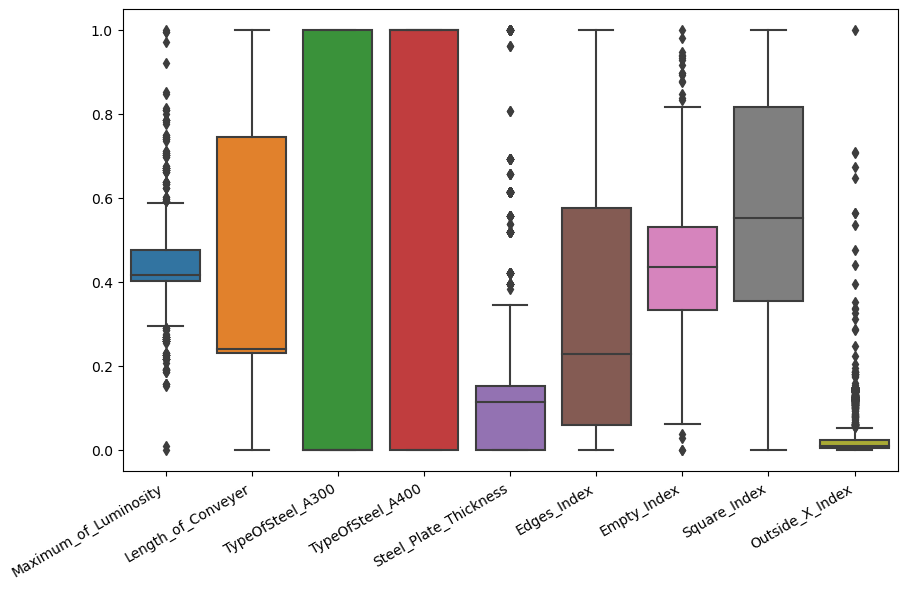

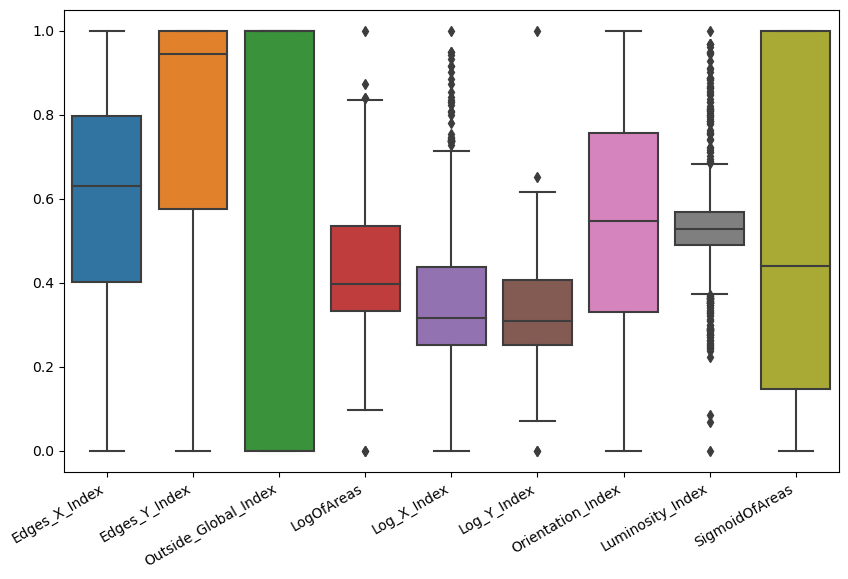

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_graph = df.copy()
df_graph = df_graph.iloc[:, :-7]
scaler = MinMaxScaler()
df_graph_scaler = scaler.fit_transform(df_graph)
df_graph_scaler = pd.DataFrame(df_graph_scaler, columns=df.columns[:-7])

# 그룹당 9개의 컬럼으로 나누어 박스플롯 그리기
num_groups = 3
cols_per_group = 9

for group in range(num_groups):
    start_idx = group * cols_per_group
    end_idx = (group + 1) * cols_per_group
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df_graph_scaler.iloc[:, start_idx:end_idx])
    
    # x축 레이블의 각도 조절
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
    # 그래프 저장하기
    plt.savefig(f"boxplot_group_{group+1}.png", bbox_inches='tight')
    plt.show()

##### Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Log_Y_Index

##### 특성공학 제거 Log_X_index, Log_Y_index

In [8]:
df.nlargest(5, 'Pixels_Areas') # 전체적으로 다 다른데이터들에 비해 큼(391번 인덱스)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,1336,0,1,40,0.0284,0.9439,0.0083,0.1123,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,0,0,1,0,0,0,0
1592,15,149,2278497,2278909,37334,908,903,3918209,19,134,1387,0,1,40,0.0216,0.3238,0.3252,0.0966,0.1476,0.4563,1.0,4.5721,2.1271,2.6149,0.6748,-0.1801,1.0,0,0,0,0,0,0,1
394,0,225,344016,344225,25473,992,578,3061597,23,148,1400,0,1,40,0.0000,0.4583,0.9289,0.1607,0.2268,0.3616,0.0,4.4061,2.3522,2.3201,-0.0711,-0.0610,1.0,0,0,1,0,0,0,0
392,0,230,308503,308712,25323,1022,593,3037459,24,148,1400,0,1,40,0.0000,0.4732,0.9087,0.1643,0.2251,0.3525,0.0,4.4035,2.3617,2.3201,-0.0913,-0.0629,1.0,0,0,1,0,0,0,0
395,0,436,407936,408170,24365,1084,680,2935414,22,143,1404,0,1,40,0.0000,0.7612,0.5367,0.3105,0.4022,0.3441,0.0,4.3868,2.6395,2.3692,-0.4633,-0.0588,1.0,0,0,1,0,0,0,0


In [9]:
df = df.drop(df.nlargest(1, 'Pixels_Areas').index)

In [10]:
df.nlargest(5, 'Pixels_Areas') # 위의 152655 Pixels_Areas 제거

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1592,15,149,2278497,2278909,37334,908,903,3918209,19,134,1387,0,1,40,0.0216,0.3238,0.3252,0.0966,0.1476,0.4563,1.0,4.5721,2.1271,2.6149,0.6748,-0.1801,1.0,0,0,0,0,0,0,1
394,0,225,344016,344225,25473,992,578,3061597,23,148,1400,0,1,40,0.0000,0.4583,0.9289,0.1607,0.2268,0.3616,0.0,4.4061,2.3522,2.3201,-0.0711,-0.0610,1.0,0,0,1,0,0,0,0
392,0,230,308503,308712,25323,1022,593,3037459,24,148,1400,0,1,40,0.0000,0.4732,0.9087,0.1643,0.2251,0.3525,0.0,4.4035,2.3617,2.3201,-0.0913,-0.0629,1.0,0,0,1,0,0,0,0
395,0,436,407936,408170,24365,1084,680,2935414,22,143,1404,0,1,40,0.0000,0.7612,0.5367,0.3105,0.4022,0.3441,0.0,4.3868,2.6395,2.3692,-0.4633,-0.0588,1.0,0,0,1,0,0,0,0
398,1,222,486069,486291,22554,999,605,2712104,27,150,1400,0,1,40,0.0014,0.5403,0.9955,0.1579,0.2212,0.3669,1.0,4.3532,2.3444,2.3463,0.0045,-0.0606,1.0,0,0,1,0,0,0,0


In [11]:
df_sample = df.copy()

df_sample['Log_Pixels_Areas'] = np.log(df_sample['Pixels_Areas'])

#### 기존 Pixels_Areas 분포

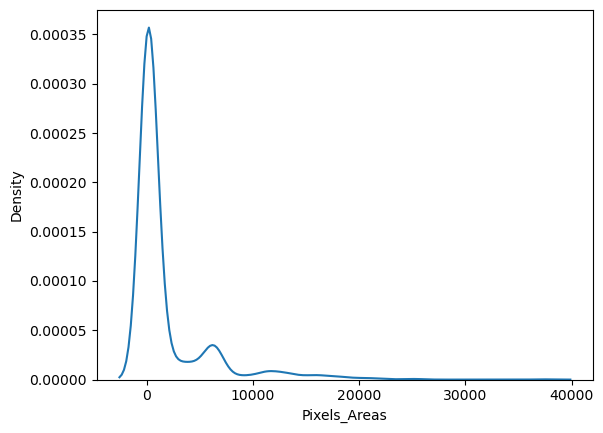

In [12]:
sns.kdeplot(df['Pixels_Areas']);

#### log함수 씌운 Pixel_Areas 분포

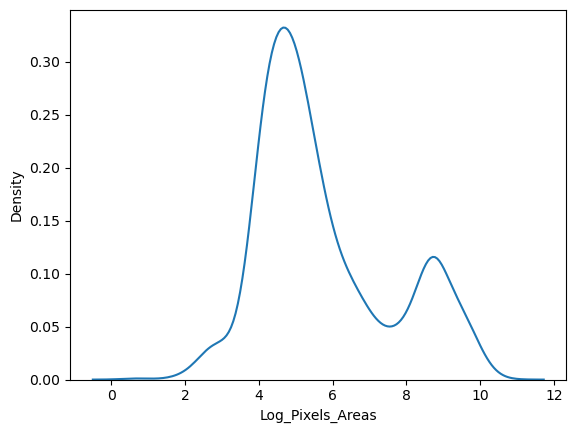

In [13]:
sns.kdeplot(df_sample['Log_Pixels_Areas']);

In [70]:
# df_sample이라는 변수에 df_sample에 기존 Pixels_Areas 제거 drop사용하면 다시 돌릴때 에러가 자주 발생해서 바꿈

df_sample = df_sample.loc[:, ~df_sample.columns.isin(['Pixels_Areas'])]

##### TypeOfSteel_A300과 400이 0, 1이기때문에 하나를 제거하기로 함
##### 상관관계가 높기에 수식을 짜 하나의 컬럼으로 생성(다중공선성 해결방안)
##### 'Area' : (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])

In [15]:
# 일단 카피
df_clear = df.copy()
# 타겟특성 빼고 변수에 저장
df_clear = df_clear.drop(df.iloc[:,-7:].columns, axis=1)
# Area라는 컬럼 생성
df_clear['Area'] = (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])
# Area컬럼을 생성하는데 사용된 피쳐 제거(X_Maximum, X_Minimum, Y_Maximum, Y_Minimum)
df_clear = df_clear.drop(df.iloc[:, :4].columns, axis=1)
# A300 제거(300 or 400이라 하나 제거 후 컬럼명 어떻게 할지 고민)
df_clear = df_clear.drop('TypeOfSteel_A300', axis=1)
# 일단 TypeOfSteel로만 변경해서 설명란에 0은 300 1은 400으로 해보기로
df_clear.rename(columns={'TypeOfSteel_A400':'TypeOfSteel'}, inplace=True)
# Log_X_index, Log_Y_index 제거 LogOFAreas가 합친결과값으로 판단되어 제거하기로 함
df_clear = df_clear.drop(['Log_X_Index', 'Log_Y_Index'], axis=1)
df_clear.head()

,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Area
0,267,17,44,24220,76,108,1687,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.8182,-0.2913,0.5822,352
1,108,10,30,11397,84,123,1687,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7931,-0.1756,0.2984,174
2,71,8,19,7972,99,125,1623,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.6667,-0.1228,0.2150,108
3,176,13,45,18996,99,126,1353,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8444,-0.1568,0.5212,315
4,2409,60,260,246930,37,126,1353,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,0.9338,-0.1992,1.0000,4369


In [44]:
# 실험용 로그 적용한 파일

# 일단 카피
df_clear2 = df_sample.copy()
# 타겟특성 빼고 변수에 저장
df_clear2 = df_clear2.drop(df_clear2.iloc[:,-8:-1].columns, axis=1)
# Area라는 컬럼 생성
df_clear2['Area'] = (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])
# Area컬럼을 생성하는데 사용된 피쳐 제거(X_Maximum, X_Minimum, Y_Maximum, Y_Minimum)
df_clear2 = df_clear2.drop(df.iloc[:, :4].columns, axis=1)
# A300 제거(300 or 400이라 하나 제거 후 컬럼명 어떻게 할지 고민)
df_clear2 = df_clear2.drop('TypeOfSteel_A300', axis=1)
# 일단 TypeOfSteel로만 변경해서 설명란에 0은 300 1은 400으로 해보기로
df_clear2.rename(columns={'TypeOfSteel_A400':'TypeOfSteel'}, inplace=True)
# Log_X_index, Log_Y_index 제거 LogOFAreas가 합친결과값으로 판단되어 제거하기로 함
df_clear2 = df_clear2.drop(['Log_X_Index', 'Log_Y_Index'], axis=1)
df_clear2.head()

,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Log_Pixels_Areas,Area
0,17,44,24220,76,108,1687,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.8182,-0.2913,0.5822,5.587249,352
1,10,30,11397,84,123,1687,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7931,-0.1756,0.2984,4.682131,174
2,8,19,7972,99,125,1623,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.6667,-0.1228,0.2150,4.262680,108
3,13,45,18996,99,126,1353,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8444,-0.1568,0.5212,5.170484,315
4,60,260,246930,37,126,1353,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,0.9338,-0.1992,1.0000,7.786967,4369


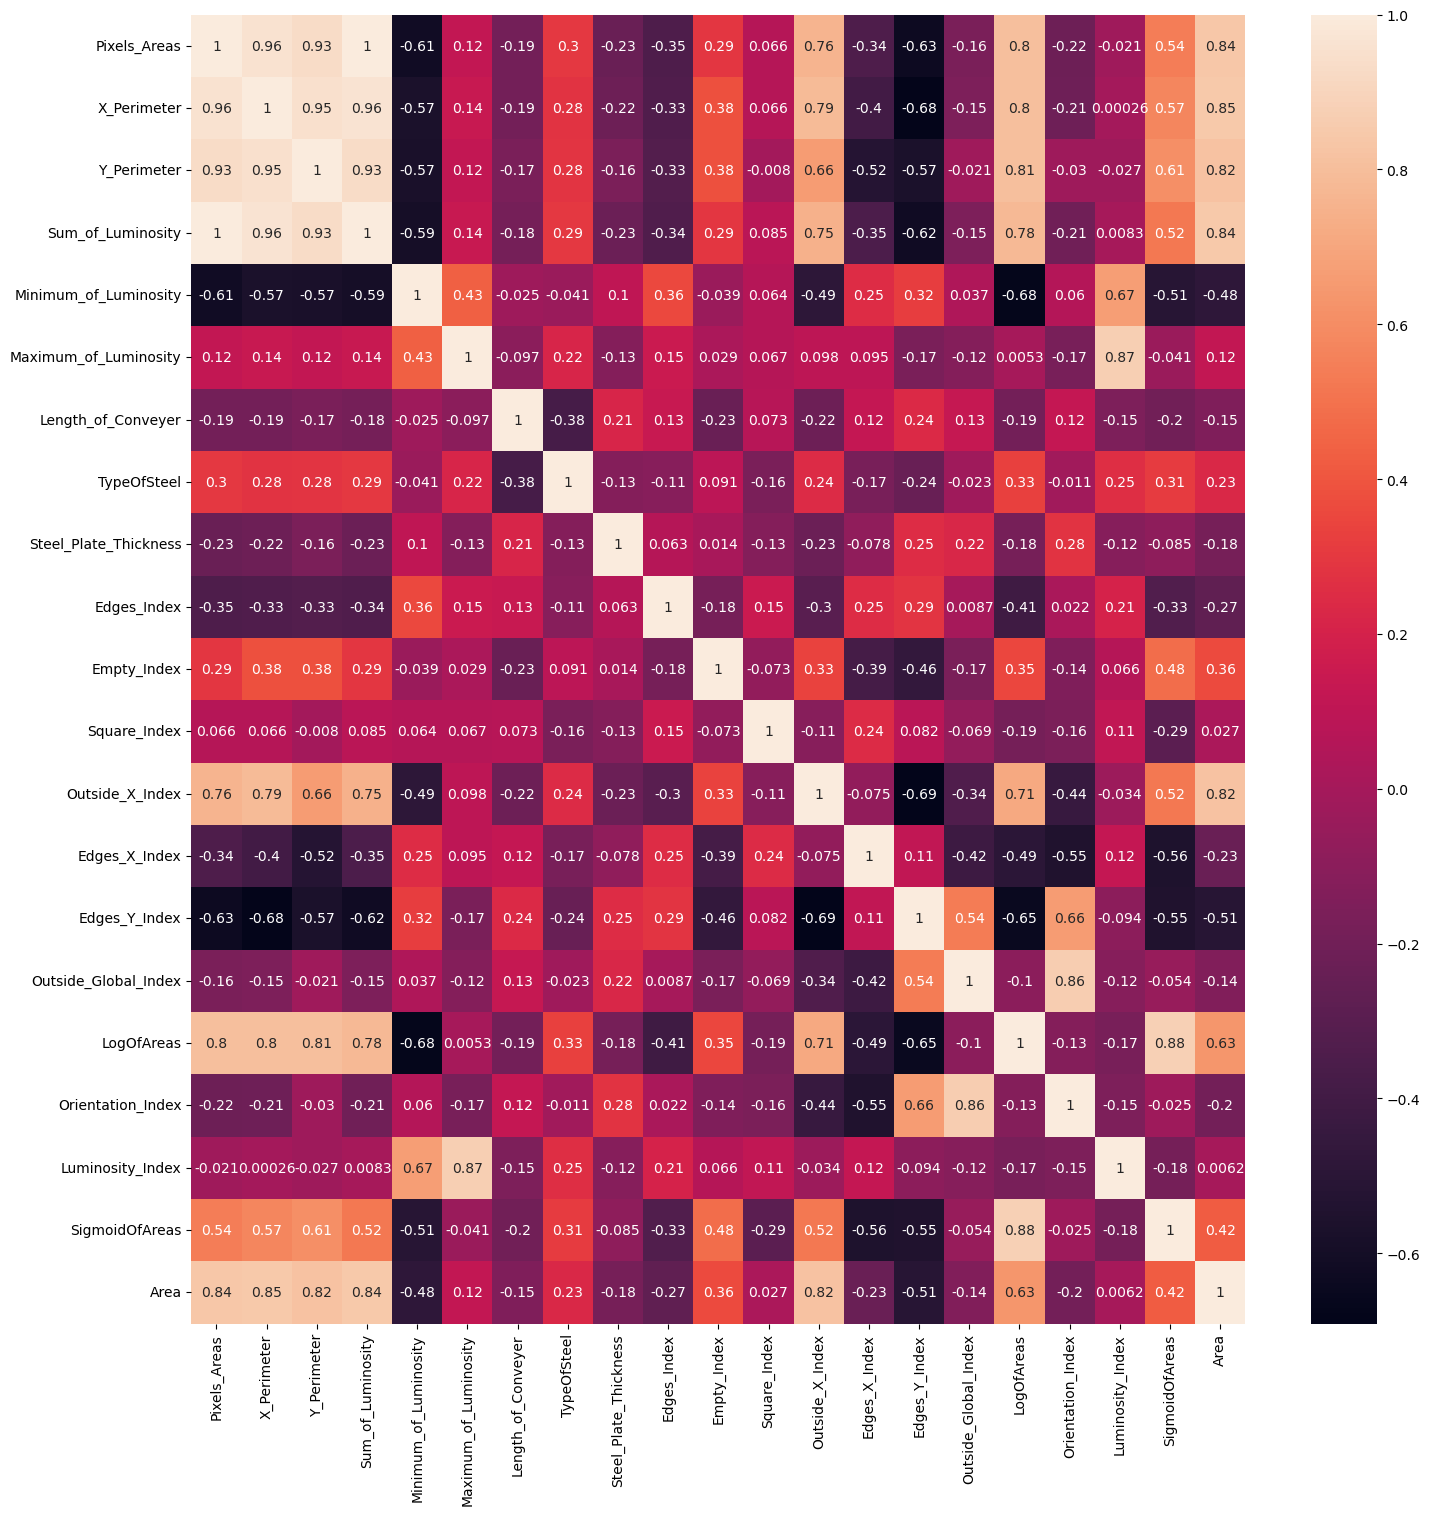

In [17]:
plt.figure(figsize=(17,17))
sns.heatmap(df_clear.corr(),annot=True)
plt.show()

#### 실험

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [91]:
y_list = list(df.iloc[:,-7:].columns)
df_target = df.copy()
df_target["Type"] = df_target.loc[:,y_list][y_list].idxmax(axis=1)
df_target = df_target.drop(columns=y_list)
display(df_target['Type'].value_counts())
# 밑에 카운트플롯 그리는 용도
df_target_sorted = df_target['Type'].value_counts().reset_index()
df_target_sorted.columns = ['Type', 'Count']
df_target_sorted = df_target_sorted.sort_values(by='Count', ascending=False)

Other_Faults    673
Bumps           402
K_Scatch        390
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: Type, dtype: int64

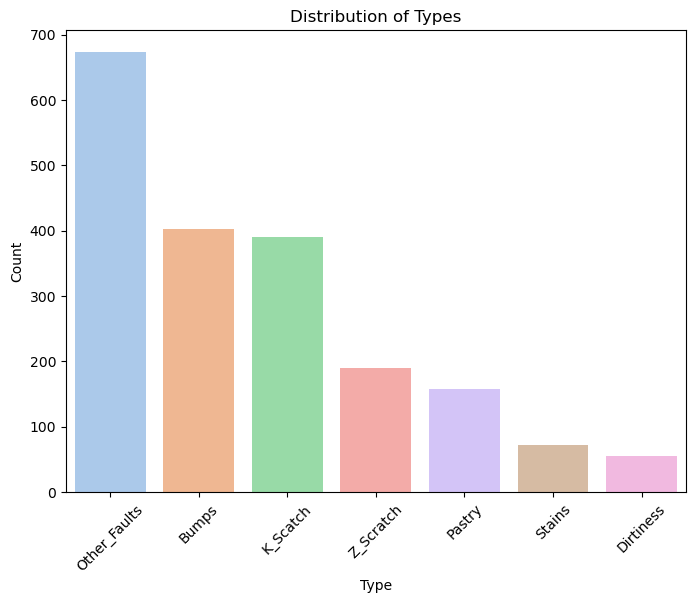

In [79]:
# 카운트플롯 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Count', data=df_target_sorted, palette='pastel', order=df_target_sorted['Type'])
plt.title('Distribution of Types')
plt.xticks(rotation=45)  # X 축 라벨 회전
plt.show()

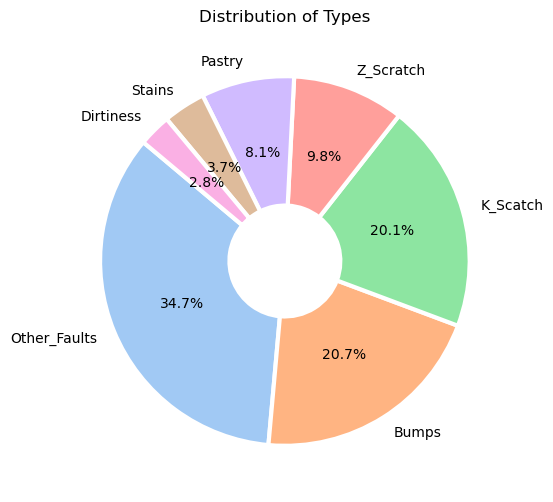

In [77]:
# 파이 차트 그리기
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")  # 색상 팔레트 지정
df_target['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140,
                                      wedgeprops=dict(width=0.7, linewidth=3, edgecolor='white'))
plt.title('Distribution of Types')
plt.ylabel('')  # y축 라벨 제거
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

x = df_clear2
y = df_target["Type"]

# 스케일링
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler, columns=x.columns)

# 훈련
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2)
encoder = LabelEncoder()
y_train, y_test = encoder.fit_transform(y_train), encoder.fit_transform(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1552, 21), (388, 21), (1552,), (388,))

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def get_metrics(model, X, y):
    y_pred=model.predict(X)
    
    Precision    = metrics.precision_score (y, y_pred, average="weighted")
    Recall       = metrics.recall_score    (y, y_pred, average="weighted")
    Accuracy     = metrics.accuracy_score  (y, y_pred)
    F1           = metrics.f1_score        (y, y_pred, average="weighted")
    
    print(f'Precision Score  : {Precision}')
    print(f'Recall Score     : {Recall}')
    print(f'Accuracy Score   : {Accuracy}')
    print(f'F1 Score         : {F1}')
    return Precision, Recall, Accuracy, F1

In [67]:
import time

model_rf = RandomForestClassifier()
start_time = time.time()
model_rf.fit(x_train, y_train)
end_time= time.time()
rf_precision_train, rf_recall_train, rf_accuracy_train, rf_f1_train = get_metrics(model_rf, x_train, y_train)
print('실행시간 : ', end_time - start_time)
print('='*100)
rf_precision_test, rf_recall_test, rf_accuracy_test, rf_f1_test = get_metrics(model_rf, x_test, y_test)

Precision Score  : 1.0
Recall Score     : 1.0
Accuracy Score   : 1.0
F1 Score         : 1.0
실행시간 :  0.3422720432281494
Precision Score  : 0.775510586946042
Recall Score     : 0.7628865979381443
Accuracy Score   : 0.7628865979381443
F1 Score         : 0.7602459927594581


### 특성중요도 확인(전처리 추가해보기위해 실험)

In [86]:
importances = model_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [87]:
importance_df

,Feature,Importance
5,Length_of_Conveyer,0.071403
19,Log_Pixels_Areas,0.067441
7,Steel_Plate_Thickness,0.066750
20,Area,0.061681
11,Outside_X_Index,0.059812
15,LogOfAreas,0.058434
8,Edges_Index,0.055193
16,Orientation_Index,0.053017
2,Sum_of_Luminosity,0.052906
3,Minimum_of_Luminosity,0.052355


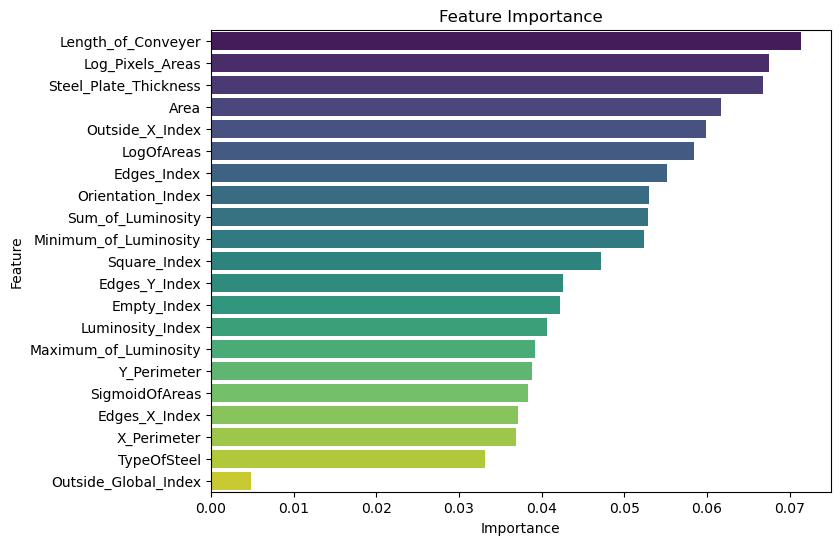

In [88]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()